In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train = train.drop(['PassengerId', 'Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin'], axis = 1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,True
2,Europa,False,TRAPPIST-1e,58.0,True,False
3,Europa,False,TRAPPIST-1e,33.0,False,False
4,Earth,False,TRAPPIST-1e,16.0,False,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   VIP          8490 non-null   object 
 5   Transported  8693 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 348.2+ KB


In [4]:
train.isna().sum()

HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

imputer.fit(train[['HomePlanet']])
train['HomePlanet'] = imputer.transform(train[['HomePlanet']]).ravel()

imputer.fit(train[['CryoSleep']])
train['CryoSleep'] = imputer.transform(train[['CryoSleep']]).ravel()

imputer.fit(train[['Destination']])
train['Destination'] = imputer.transform(train[['Destination']]).ravel()

imputer.fit(train[['VIP']])
train['VIP'] = imputer.transform(train[['VIP']]).ravel()

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer.fit(train[['Age']])
train['Age'] = imputer.transform(train[['Age']]).ravel()

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
transformer = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse_output = False), cat_columns)
    ],
    remainder = 'passthrough'
)
transformed = transformer.fit_transform(train)
new_columns = transformer.named_transformers_['cat'].get_feature_names_out(cat_columns)
all_columns = list(new_columns) + [col for col in train.columns if col not in cat_columns]
encoded_train = pd.DataFrame(transformed, columns = all_columns)
encoded_train.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Age,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,39.0,False
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,24.0,True
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,58.0,False
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,33.0,False
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,16.0,True


<Axes: >

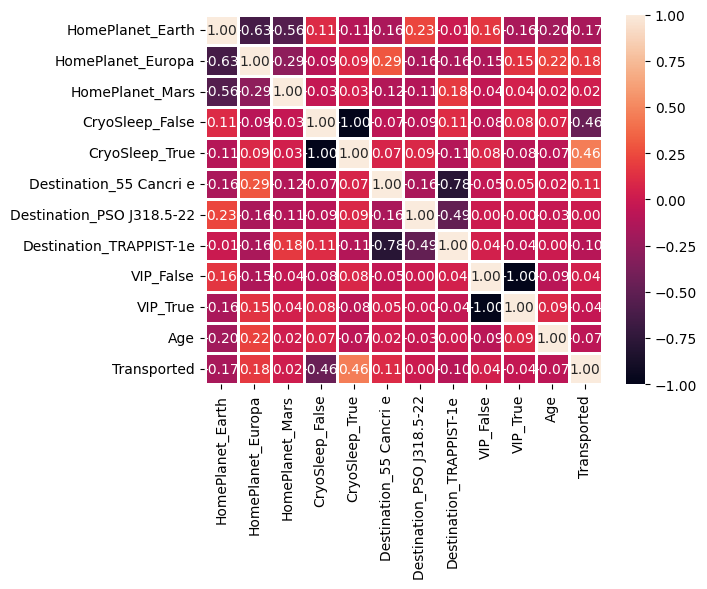

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = encoded_train.corr()
sns.heatmap(corr, annot = True, fmt = '.2f', linewidth = 1)


In [8]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoded_train['Transported'] = encoder.fit_transform(encoded_train['Transported'])
#y_train = encoded_train['Transported']
#encoded_train = encoded_train.drop(['Transported'], axis = 1)

In [9]:
encoded_train.head()
encoded_train = encoded_train.drop(['Transported'], axis = 1)

In [10]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test = test.drop(['PassengerId', 'Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin'], axis = 1)

In [11]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

imputer.fit(test[['HomePlanet']])
test['HomePlanet'] = imputer.transform(test[['HomePlanet']]).ravel()

imputer.fit(test[['CryoSleep']])
test['CryoSleep'] = imputer.transform(test[['CryoSleep']]).ravel()

imputer.fit(test[['Destination']])
test['Destination'] = imputer.transform(test[['Destination']]).ravel()

imputer.fit(test[['VIP']])
test['VIP'] = imputer.transform(test[['VIP']]).ravel()

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer.fit(test[['Age']])
test['Age'] = imputer.transform(test[['Age']]).ravel()

In [12]:
test.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
dtype: int64

In [13]:
transformed = transformer.fit_transform(test)
new_columns = transformer.named_transformers_['cat'].get_feature_names_out(cat_columns)
all_columns = list(new_columns) + [col for col in test.columns if col not in cat_columns]
encoded_test = pd.DataFrame(transformed, columns = all_columns)
encoded_test.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Age
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,27.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,19.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,31.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,38.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,20.0


In [14]:
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
passengerID = submission.PassengerId

In [15]:
#y_submission = encoder.fit_transform(submission['Transported'])


In [16]:
y_train = train['Transported']
y_submission = submission['Transported']


In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 60, max_depth = 3)
model.fit(encoded_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=60)

In [18]:
y_pred = model.predict(encoded_test)

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print(f'Accuracy: {accuracy_score(y_submission, y_pred)}')

Accuracy: 0.6256722001402852


In [20]:
y_pred

array([ True, False,  True, ...,  True, False,  True])

In [21]:
output = submission
output.to_csv('submission.csv', index = False)
